<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/DerbydItalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 derbies played:
inter = pd.ExcelFile('Inter Derbies.xlsx')
derby = pd.read_excel(inter, "Derby d'Italia")
derby.tail(10)

,Season,Competition,Date,Home team,Score A,Score B,Away team
241,2021–22,Serie A,2021-10-24,Inter,1,1,Juventus
242,2021–22,Supercoppa Italiana,2022-01-12,Inter,2,1,Juventus
243,2021–22,Serie A,2022-04-03,Juventus,0,1,Inter
244,2021–22,Coppa Italia Final,2022-05-11,Juventus,2,4,Inter
245,2022–23,Serie A,2022-11-06,Juventus,2,0,Inter
246,2022–23,Serie A,2023-03-19,Inter,0,1,Juventus
247,2022–23,Coppa Italia SF,2023-04-04,Juventus,1,1,Inter
248,2022–23,Coppa Italia SF,2023-04-26,Inter,1,0,Juventus
249,2023–24,Serie A,2023-11-26,Juventus,1,1,Inter
250,2023–24,Serie A,2024-02-04,Inter,1,0,Juventus


In [3]:
# Displaying the number of rows and columns in the dataset:
derby.shape

(251, 7)

# **Plotting basic column data**

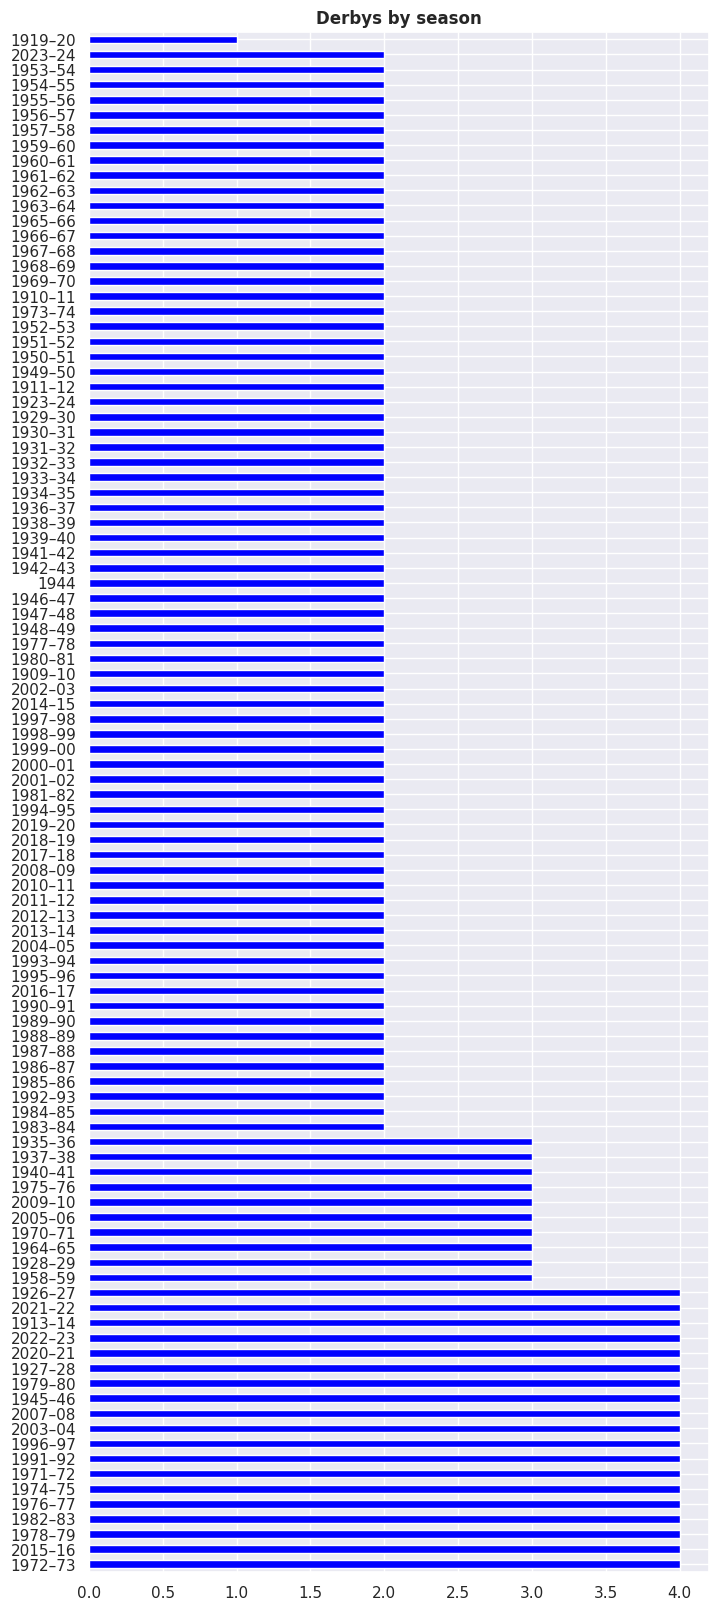

In [4]:
# Displaying derbys by season:
derby['Season'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Derbys by season', fontweight = 'bold')
plt.show()

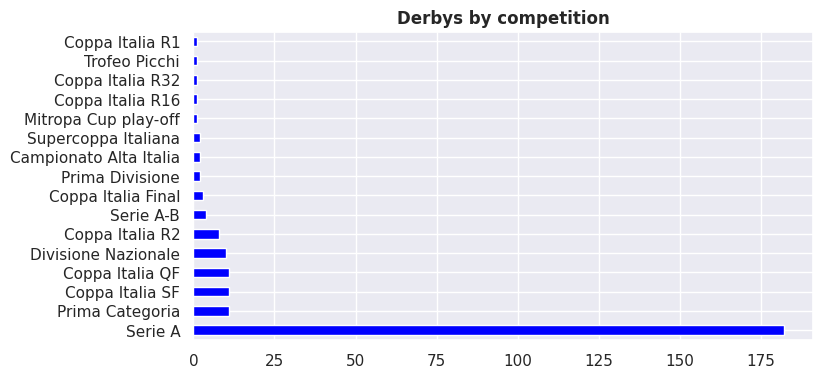

In [5]:
# Displaying derbys by competition:
derby['Competition'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Derbys by competition', fontweight = 'bold')
plt.show()

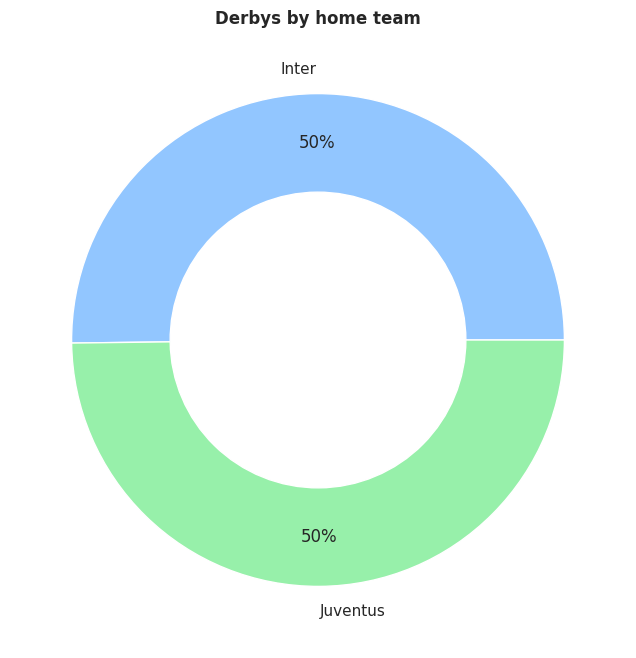

In [6]:
# Displaying derbys by home team:
derby['Home team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by home team', fontweight = 'bold')
plt.show()

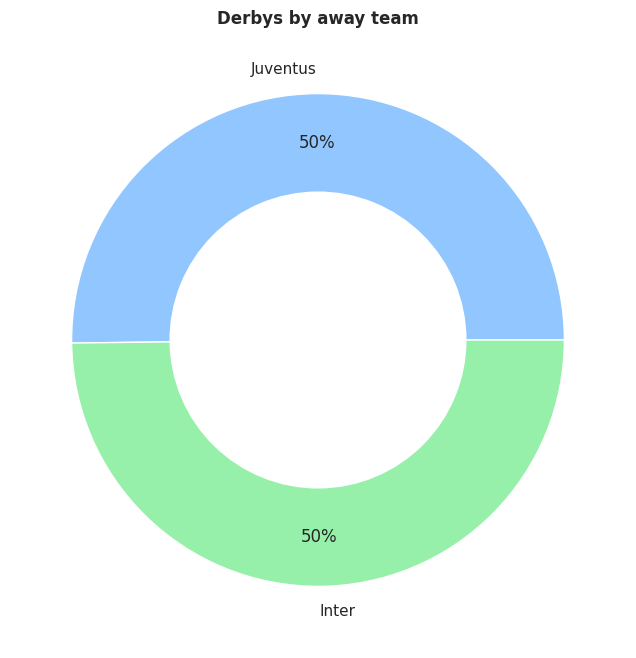

In [7]:
# Displaying derbys by away team:
derby['Away team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by away team', fontweight = 'bold')
plt.show()

In [8]:
# Classifying the derby winners:
def who_won(row):
  home_team = row['Home team']
  away_team = row['Away team']
  home_score = row['Score A']
  away_score = row['Score B']

  if home_team == 'Inter' and home_score > away_score or away_team == 'Inter' and away_score > home_score:
      return 'Inter'
  elif home_team == 'Juventus' and home_score > away_score or away_team == 'Milan' and away_score > home_score:
      return 'Juventus'
  else:
      return 'Draw'

# Applying the function above on a column of the dataset and generating a new column as result:
derby['Who won'] = derby.apply(who_won, axis=1)
derby.head()

,Season,Competition,Date,Home team,Score A,Score B,Away team,Who won
0,1909–10,Prima Categoria,1909-11-14,Juventus,2,0,Inter,Juventus
1,1909–10,Prima Categoria,1909-11-28,Inter,1,0,Juventus,Inter
2,1910–11,Prima Categoria,1911-03-12,Inter,1,1,Juventus,Draw
3,1910–11,Prima Categoria,1911-05-28,Juventus,0,2,Inter,Inter
4,1911–12,Prima Categoria,1911-11-26,Inter,6,1,Juventus,Inter


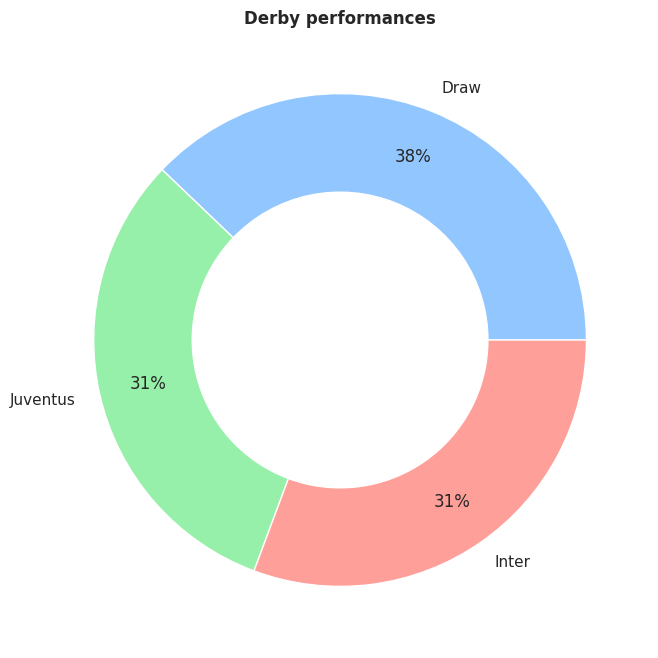

In [9]:
# Displaying who won the derby the most:
derby['Who won'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derby performances', fontweight = 'bold')
plt.show()

In [18]:
inter_home_goals = (derby.apply(lambda x: derby.loc[(derby['Home team'] == 'Inter'), 'Score A'].sum, axis=1))
inter_away_goals = (derby.apply(lambda x: derby.loc[(derby['Away team'] == 'Inter'), 'Score B'].sum, axis=1))

print('Inter Home Goals: ', inter_home_goals)
print('Inter Away Goals: ', inter_away_goals)

Inter Home Goals:  0      <bound method NDFrame._add_numeric_operations....
1      <bound method NDFrame._add_numeric_operations....
2      <bound method NDFrame._add_numeric_operations....
3      <bound method NDFrame._add_numeric_operations....
4      <bound method NDFrame._add_numeric_operations....
                             ...                        
246    <bound method NDFrame._add_numeric_operations....
247    <bound method NDFrame._add_numeric_operations....
248    <bound method NDFrame._add_numeric_operations....
249    <bound method NDFrame._add_numeric_operations....
250    <bound method NDFrame._add_numeric_operations....
Length: 251, dtype: object
Inter Away Goals:  0      <bound method NDFrame._add_numeric_operations....
1      <bound method NDFrame._add_numeric_operations....
2      <bound method NDFrame._add_numeric_operations....
3      <bound method NDFrame._add_numeric_operations....
4      <bound method NDFrame._add_numeric_operations....
                       